In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import vstack,array
from numpy.random import rand
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [5]:
df.dtypes

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

### Exercise 1
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance


In [6]:
df.drop(["DATE", "SP500"], axis=1, inplace=True)

In [7]:
"NYSE.XRX" in df.columns

True

In [8]:
correlation = df.corr()
correlation.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [9]:
correlation[correlation["NASDAQ.AAPL"] > 0.75].head(10)

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.EQIX,0.395456,0.809816,0.924572,0.300005,0.379009,0.892084,-0.856396,0.375254,0.745042,-0.078936,...,0.677001,-0.650246,0.897076,0.569031,-0.713663,0.643071,0.829961,0.909405,-0.237234,0.786478
NASDAQ.SNPS,0.289004,0.804716,0.883790,0.165353,0.481264,0.703556,-0.651626,0.542251,0.616562,0.086873,...,0.529449,-0.575938,0.842628,0.493616,-0.805566,0.641851,0.857648,0.790605,-0.296172,0.570248
NYSE.AEE,-0.045216,0.758324,0.703770,0.205655,0.409824,0.609666,-0.597942,0.366547,0.338382,-0.060802,...,0.242309,-0.410186,0.917896,0.181526,-0.801001,0.505815,0.750596,0.634116,-0.553473,0.353172
NYSE.APH,0.383449,0.788199,0.913891,0.240329,0.504648,0.831877,-0.791072,0.448737,0.641455,0.030782,...,0.629386,-0.708181,0.940853,0.564816,-0.775402,0.723251,0.912715,0.902671,-0.292394,0.708834
NYSE.COL,0.157186,0.803609,0.816689,0.069394,0.522782,0.611375,-0.624630,0.612489,0.388990,0.034415,...,0.365249,-0.527616,0.827748,0.410628,-0.872501,0.688251,0.906402,0.717163,-0.516282,0.427192
NYSE.CRM,0.356903,0.839678,0.895116,0.358590,0.326073,0.851705,-0.791841,0.309936,0.768372,-0.054651,...,0.599896,-0.547233,0.823144,0.500163,-0.710438,0.532145,0.764763,0.830991,-0.239679,0.717510
NYSE.DXC,-0.008142,0.835171,0.733349,0.063088,0.285202,0.510746,-0.612892,0.575672,0.351441,-0.068737,...,0.224438,-0.303087,0.680786,0.299295,-0.814212,0.526645,0.751131,0.604264,-0.558723,0.346336
NYSE.FMC,0.156465,0.786389,0.778065,0.081801,0.570653,0.590478,-0.595268,0.561059,0.339330,0.103191,...,0.311901,-0.524816,0.836978,0.360193,-0.808379,0.666105,0.890433,0.683236,-0.513938,0.375047
NYSE.RCL,0.429721,0.775266,0.922891,0.160778,0.453459,0.833158,-0.812483,0.486046,0.685744,-0.012667,...,0.713059,-0.724386,0.876056,0.665520,-0.700692,0.729475,0.882982,0.919604,-0.225372,0.769279


### Exercise 2
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

In [10]:
# Find the average annual percentage returns for each stock (column)
returns = pd.DataFrame()
returns["Return"] = df.pct_change().mean()*252
returns["Volatility"] = df.pct_change().std()*sqrt(252)
returns

,Return,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048
...,...,...
NYSE.XRX,0.018951,0.234735
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [11]:
import warnings
warnings.filterwarnings('ignore')

returns["Volatility"] = df.pct_change().std()*sqrt(252)
returns

,Return,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048
...,...,...
NYSE.XRX,0.018951,0.234735
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [12]:
# Convert Dataframe to Numpy Array
X = returns

inertia= []
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    inertia.append(k_means.inertia_)   # inertia shows how far the points are within a cluster

In [13]:
# When the number of clusters increases, inertia decreases.
inertia

[0.00917962402570178,
 0.003828999100605379,
 0.002314159740315446,
 0.0015984013213383918,
 0.0011782725635729138,
 0.0009433077420081315,
 0.0008015009576838676,
 0.0006942844563045886,
 0.0005880242382703074,
 0.0005276629030550295,
 0.00046707437576944236,
 0.00042762523566682975,
 0.00039209392106027415,
 0.00036577919932476643,
 0.0003338240064441426,
 0.00030926599214911447,
 0.0002843252146015455,
 0.00027734889863681775]

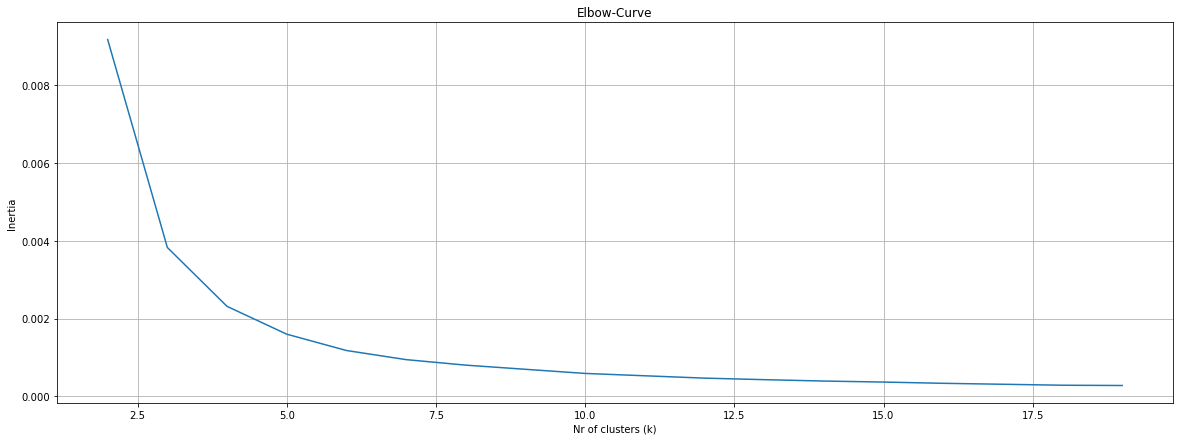

In [14]:
# Elbow method to find the best value of number of clusters
fig = plt.figure(figsize=(20,7))
plt.plot(range(2,20), inertia)
plt.grid(True)
plt.title('Elbow-Curve')
plt.xlabel("Nr of clusters (k)")
plt.ylabel("Inertia")
plt.show()

# At cluster no.5 or 4 the curve has a steep , so we choose 5 as the number of clusters
# When number of clusters is greater than 5, inertia decreases very slowly

In [15]:
# Fitting K-Means to the dataset
nr_clusters = 5
kmeans = KMeans(n_clusters = nr_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
#print(kmeans.labels_)

[0 2 2 2 2 0 0 0 0 4 3 2 2 2 0 2 0 3 2 2 2 0 2 2 3 2 2 2 2 3 2 0 0 0 0 0 2
 2 0 2 2 2 0 2 0 3 2 2 2 2 3 3 2 2 0 2 0 2 2 2 0 4 3 3 2 2 2 3 2 2 0 2 0 2
 3 2 3 0 0 0 3 0 2 2 4 4 2 0 3 2 2 2 0 2 3 0 0 0 2 0 3 0 2 4 2 2 0 2 0 3 0
 0 3 2 4 2 0 4 2 0 2 2 0 2 4 3 2 3 3 2 0 3 3 2 3 3 3 3 3 2 3 2 2 3 3 3 2 2
 3 0 2 3 0 0 3 3 3 0 3 3 3 3 0 0 3 2 3 2 0 0 3 2 2 4 3 3 4 2 3 3 0 2 2 2 0
 2 3 2 2 3 3 0 0 3 4 3 3 3 2 0 2 3 2 3 2 0 0 2 2 2 0 2 2 2 0 3 3 0 3 2 3 2
 2 0 3 2 3 3 2 2 2 3 3 2 3 3 2 0 2 3 3 2 3 2 2 3 2 3 0 3 2 2 3 0 2 3 2 2 3
 0 3 3 3 4 0 0 2 2 0 3 3 2 0 3 2 2 2 2 0 2 0 2 2 2 3 2 3 0 3 0 3 0 2 2 0 2
 3 2 3 2 3 3 2 3 0 3 2 2 3 2 2 2 3 2 3 4 3 0 0 3 2 0 3 4 0 0 2 3 4 3 2 2 2
 3 3 2 3 2 2 2 3 2 0 3 3 2 2 3 2 3 3 2 2 2 0 3 3 0 2 3 0 2 3 0 2 3 2 0 0 3
 2 0 3 2 2 3 0 4 2 0 2 3 2 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 2 2 3 3 3 0 2 2 3
 0 2 3 0 3 2 2 0 2 2 4 2 0 2 3 0 3 3 2 2 2 2 4 2 2 2 2 3 2 3 3 2 2 2 3 0 3
 3 3 2 0 2 0 2 2 3 3 3 2 2 2 3 2 0 0 2 3 2 3 2 3 3 0 3 3 3 3 2 2 0 0 3 3 2
 3 2 2 3 2 3 2 2 3 2 0 3 

In [16]:
kmeans.cluster_centers_

array([[-0.00044207,  0.01571313],
       [ 0.01895054,  0.23473517],
       [ 0.00024169,  0.01087764],
       [ 0.00039593,  0.00755605],
       [-0.00047483,  0.02458815]])

In [17]:
X[y_kmeans == 3]

,Return,Volatility
NASDAQ.AMGN,0.000509,0.008783
NASDAQ.CBOE,0.001373,0.008338
NASDAQ.CME,0.000353,0.008203
NASDAQ.CTSH,0.001067,0.007803
NASDAQ.FISV,0.000449,0.007682
...,...,...
NYSE.XEL,0.000679,0.005749
NYSE.XL,0.000195,0.008365
NYSE.XOM,-0.000420,0.006454
NYSE.YUM,0.001151,0.006875


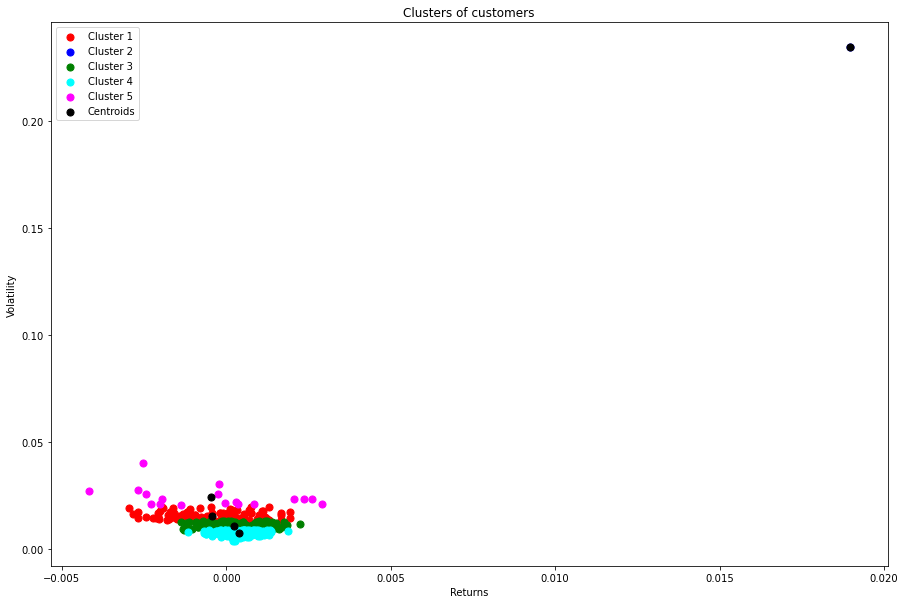

In [18]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0]['Return'], X[y_kmeans == 0]['Volatility'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Return'], X[y_kmeans == 1]['Volatility'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Return'], X[y_kmeans == 2]['Volatility'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Return'], X[y_kmeans == 3]['Volatility'], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Return'], X[y_kmeans == 4]['Volatility'], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [19]:
# We should find the outlier and delete it. 
# Since it is a point that is far from all the other points it should not be part of any cluster
# idxmax returns the index of the maximum element in each column (axis=0 by default)
# As we see the row with index NYSE.XRX is the outlier

print(returns.idxmax())

Return        NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [20]:
# drop the NYSES.XRX stock from our data
new_df = df.drop('NYSE.XRX',axis=1).copy()

returns = pd.DataFrame()
returns["Return"] = new_df.pct_change().mean()*252
returns["Volatility"] = new_df.pct_change().std()*sqrt(252)
returns
# nr of rows is 499 since we dropped one column

,Return,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048
...,...,...
NYSE.XOM,-0.000420,0.006454
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [21]:
# Fitting K-Means to the dataset
X = returns
nr_clusters = 5
kmeans = KMeans(n_clusters = nr_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
#print(kmeans.labels_)

[4 1 1 4 1 0 0 0 4 2 1 1 4 4 4 4 4 3 1 1 4 4 1 1 3 1 1 1 1 3 4 4 4 4 0 4 1
 1 4 4 1 1 4 1 4 3 4 1 4 4 1 1 1 1 0 4 4 4 1 4 4 0 3 1 4 1 1 3 4 1 4 1 4 4
 3 1 3 0 0 4 3 4 4 1 0 0 4 0 3 1 1 1 4 1 1 4 0 4 1 0 1 0 4 2 4 4 0 1 4 1 0
 0 1 1 2 1 0 2 1 4 4 1 4 1 0 3 4 3 3 1 4 3 3 4 3 3 1 3 1 1 3 1 4 3 1 3 4 1
 1 4 1 3 4 4 3 3 1 0 1 3 3 3 0 0 3 4 3 1 0 0 1 1 4 2 3 1 2 1 3 3 4 1 1 1 4
 1 3 1 1 1 3 0 4 3 2 3 3 3 4 4 1 3 4 3 4 4 4 1 1 4 0 1 1 1 4 3 3 4 3 4 3 1
 1 4 3 1 3 3 4 1 1 3 3 1 3 3 1 0 1 3 3 1 3 1 1 1 4 3 0 3 1 1 3 4 4 3 1 1 3
 0 3 1 3 2 4 0 4 1 4 1 3 1 4 3 1 1 1 1 0 1 0 4 4 1 3 1 3 0 3 4 3 0 1 4 4 1
 3 4 3 1 3 1 1 1 4 1 1 1 3 1 1 4 3 1 1 0 3 4 4 3 1 0 3 0 0 0 1 3 0 1 1 1 1
 1 3 4 3 1 1 4 1 1 0 3 1 4 1 3 4 1 3 4 1 1 4 3 3 0 1 3 4 1 3 0 4 1 1 0 4 3
 4 0 3 1 1 3 4 2 1 4 4 1 4 1 1 1 3 3 3 3 1 3 3 1 1 1 3 3 1 1 3 3 3 0 1 1 3
 4 4 1 0 3 4 1 4 1 4 0 4 0 1 3 0 3 3 1 1 1 1 2 1 1 1 1 3 4 3 3 1 1 1 3 0 3
 3 3 1 4 1 4 4 1 3 3 3 1 1 1 3 1 0 0 4 3 4 3 1 1 3 0 3 3 3 1 1 1 4 0 3 3 1
 3 1 4 3 1 1 1 1 1 1 0 3 

In [22]:
kmeans.cluster_centers_

array([[-0.00045963,  0.01796525],
       [ 0.0002769 ,  0.01004146],
       [-0.00072391,  0.02715909],
       [ 0.00042695,  0.0072255 ],
       [-0.00010964,  0.013313  ]])

In [23]:
len(y_kmeans)

499

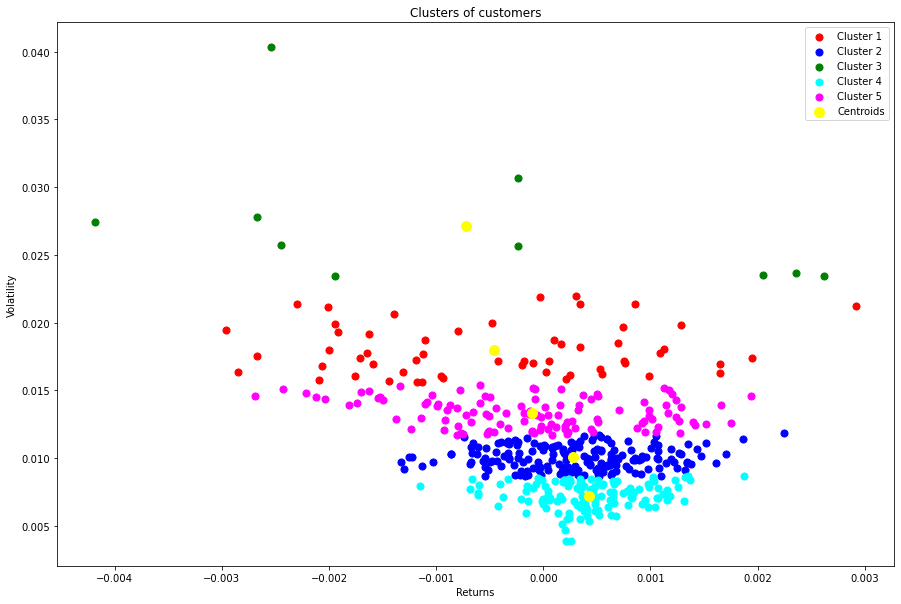

In [24]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0]['Return'], X[y_kmeans == 0]['Volatility'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Return'], X[y_kmeans == 1]['Volatility'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Return'], X[y_kmeans == 2]['Volatility'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Return'], X[y_kmeans == 3]['Volatility'], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Return'], X[y_kmeans == 4]['Volatility'], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [25]:
data = [(stock, cluster) for stock, cluster in zip(returns.index, y_kmeans)]
data[:10]

[('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 1),
 ('NASDAQ.ADBE', 1),
 ('NASDAQ.ADI', 4),
 ('NASDAQ.ADP', 1),
 ('NASDAQ.ADSK', 0),
 ('NASDAQ.AKAM', 0),
 ('NASDAQ.ALXN', 0),
 ('NASDAQ.AMAT', 4),
 ('NASDAQ.AMD', 2)]

In [26]:
datafr = pd.DataFrame(data, columns=["Stock", "Cluster"])
datafr

,Stock,Cluster
0,NASDAQ.AAL,4
1,NASDAQ.AAPL,1
2,NASDAQ.ADBE,1
3,NASDAQ.ADI,4
4,NASDAQ.ADP,1
...,...,...
494,NYSE.XOM,3
495,NYSE.XYL,1
496,NYSE.YUM,3
497,NYSE.ZBH,1


In [27]:
datafr["Cluster"].value_counts()

1    187
3    130
4    116
0     56
2     10
Name: Cluster, dtype: int64

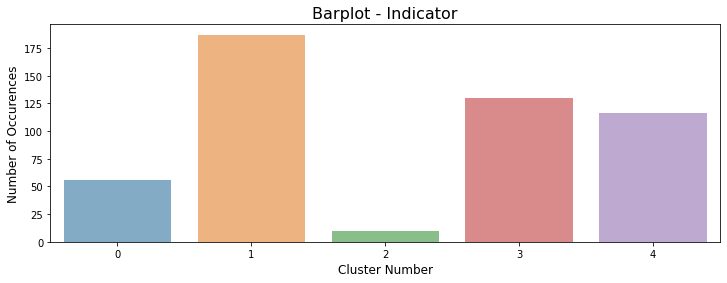

In [28]:
import seaborn as sns
clusters = datafr["Cluster"].value_counts()
plt.figure(figsize=(14,6))
sns.barplot(x=clusters.index, y=clusters.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

### Exercise 3
Identify which all stocks are moving together and which all stocks are different from
each other

In [46]:
data = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-1.65013444, -1.08607297, -1.68982378, ..., -1.95578373,
         0.10281519, -2.04188417],
       [-1.64093012, -1.08286618, -1.59006459, ..., -1.98549977,
         0.06179505, -2.04188417],
       [-1.65627065, -1.08445354, -1.60379955, ..., -1.98302344,
         0.04931066, -2.03740234],
       ...,
       [-0.91072048,  2.17363755,  1.98753131, ...,  1.2684067 ,
        -1.26868429,  0.74730823],
       [-0.9199248 ,  2.15279336,  1.97235056, ...,  1.25602502,
        -1.28295217,  0.73090473],
       [-0.91072048,  2.16882735,  2.00126627, ...,  1.25107235,
        -1.27403475,  0.74581429]])

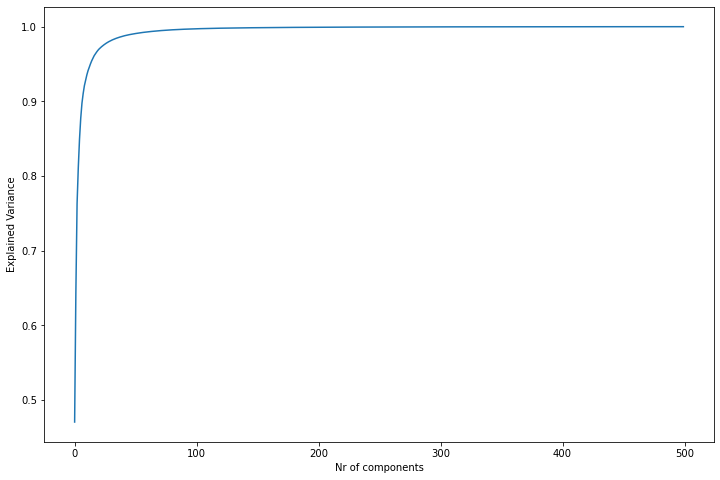

In [47]:
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nr of components")
plt.ylabel("Explained Variance")
plt.show()

# Plotting the variance explained by 500 components may not be so easy to find out the best number of components
# That's why we plot first 100 components to have a better understanding of that.

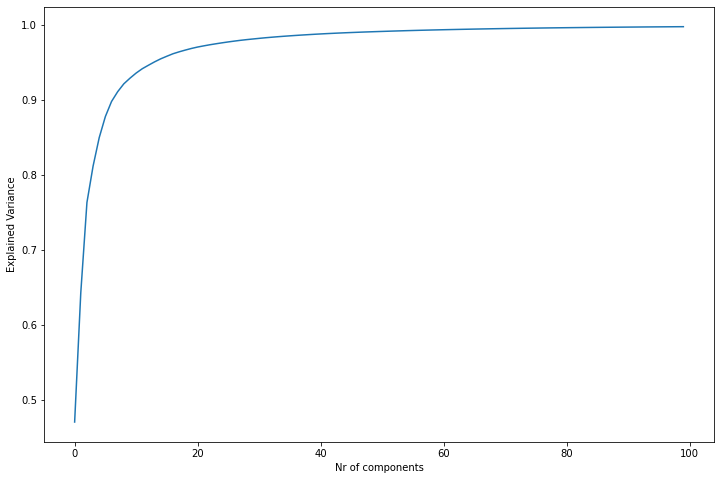

In [48]:
pca = PCA(n_components=100)
principal_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nr of components")
plt.ylabel("Explained Variance")
plt.show()

# As we see, around 25 components explain more than 95% of data 

In [51]:
pca = PCA(n_components=25)
X = pca.fit_transform(X_scaled)
print(X)

[[ 25.55018064  10.00580482  -9.38207446 ...   0.55035146   0.0915795
    2.41879491]
 [ 25.64880185   9.89282687  -9.8023104  ...   0.45227552   0.1742261
    2.31259888]
 [ 25.56345929   9.82533675  -9.67570287 ...   0.52868469   0.04718515
    2.05577402]
 ...
 [-22.76894921  13.32753802   6.56220278 ...  -2.15219472   1.19320384
   -0.31004496]
 [-22.61319638  13.41831515   6.6755356  ...  -2.13790876   1.19932217
   -0.33663689]
 [-22.72127837  13.36292841   6.60406294 ...  -2.17514341   1.17886247
   -0.29632253]]


In [52]:
# We have 25 principal components
pca.components_.shape

(25, 500)

In [53]:
# Show the principal components. Each component is a 500dimensional vector
print(pca.components_)

[[-0.03925756 -0.04106421 -0.0629084  ... -0.06247664  0.00253829
  -0.05169773]
 [-0.06428354  0.033861    0.00186129 ... -0.02040637 -0.08122924
  -0.05950068]
 [-0.03985758  0.06416494  0.01207933 ...  0.02101011 -0.06637293
   0.02356977]
 ...
 [-0.0116041   0.00533517 -0.00473388 ... -0.0117931   0.04442077
  -0.01197488]
 [ 0.07420849 -0.021428    0.00907611 ... -0.0012065  -0.01812157
   0.04836478]
 [-0.02138855  0.03319584  0.03696494 ... -0.00434245 -0.02081268
   0.0251821 ]]
